In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import tensorflow as tf
import pandas as pd

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
labels = pd.read_csv("https://raw.githubusercontent.com/nightrome/cocostuff/master/labels.txt")

In [3]:
labels = pd.DataFrame(labels["0: unlabeled"].str.split(':',1).tolist(),
                                   columns = ['label','name'])
labels["label"] = labels["label"].astype(int)

In [4]:
labels = labels.set_index("label")

In [5]:
labels_dict = labels.to_dict()
labels_dict["name"][1]

' person'

In [6]:
list_images = []

In [7]:
video2 = cv.VideoCapture('Cars-short.mp4')
total_frames = int(video2.get(cv.CAP_PROP_FRAME_COUNT))

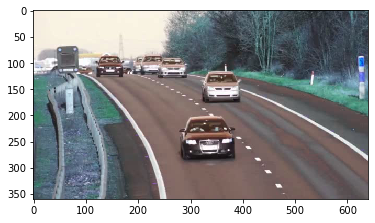

In [8]:
for current_frame in range(total_frames):
    video2.set(cv.CAP_PROP_POS_FRAMES,current_frame)
    ret,frame = video2.read()
    if not ret:
        raise Exception(f'Problem reading frame {current_frame} from video')
    frame = cv.cvtColor(frame,cv.COLOR_BGR2RGB)
    #kernel = np.ones((5,5),np.float32)/25
    #filtered = cv.filter2D(frame,-1,kernel = kernel)
    plt.imshow(frame[:,:,::-1])
    list_images.append(frame)

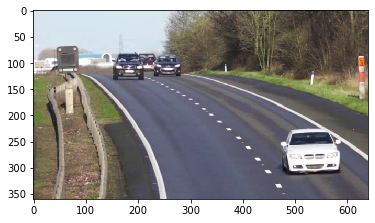

In [9]:
plt.imshow(list_images[10])

In [10]:
import urllib.request
import os
import tarfile
import shutil

base_url = 'http://download.tensorflow.org/models/object_detection/'
file_name = 'ssd_mobilenet_v1_coco_2018_01_28.tar.gz'
url = base_url + file_name
urllib.request.urlretrieve(url, file_name)
os.listdir()

dir_name = file_name[0:-len('.tar.gz')]

if os.path.exists(dir_name):
  shutil.rmtree(dir_name) 

tarfile.open(file_name, 'r:gz').extractall('./')
os.listdir(dir_name)



['checkpoint',
 'frozen_inference_graph.pb',
 'model.ckpt.data-00000-of-00001',
 'model.ckpt.index',
 'model.ckpt.meta',
 'pipeline.config',
 'saved_model']

In [11]:
import tensorflow as tf


#Open the frozen_graph file
#Load the graph into memory
with tf.Session() as sess:
    frozen_graph = os.path.join(dir_name, 'frozen_inference_graph.pb')
    with tf.gfile.FastGFile(frozen_graph,'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        g_in = tf.import_graph_def(graph_def)
LOGDIR='/logs/tests/1/'
train_writer = tf.summary.FileWriter(LOGDIR)
train_writer.add_graph(sess.graph)
    
print("Model Imported. Visualize by running: "
          "tensorboard --logdir={}".format(LOGDIR))

train_writer.flush()
train_writer.close()


Model Imported. Visualize by running: tensorboard --logdir=/logs/tests/1/


In [12]:
sess.close()

In [13]:
outputs = (
    'num_detections',
    'detection_classes',
    'detection_scores',
    'detection_boxes',
)

In [14]:
detections =[]

cap = cv.VideoCapture(0)
while True:
        ret_val, img = cap.read()
        cv.imshow('my webcam', img)
        if cv.waitKey(1) == 27: 
            break  # esc to quit
cv.destroyAllWindows()


In [15]:
cap = cv.VideoCapture(0)

In [ ]:
#input_images  = list_images[15]
with tf.Session() as sess:
    sess.graph.as_default()
    tf.import_graph_def(graph_def,name='')
    while True:
        ret, input_images = cap.read()
        image_np_expanded = np.expand_dims(input_images, axis=0)

        detections = (sess.run(
            [sess.graph.get_tensor_by_name(f'{op}:0') for op in outputs],
            feed_dict={ 'image_tensor:0': image_np_expanded }

          ))
        num_objects = int(detections[0][0])
        for j in range(num_objects):
            if detections[2][0][j]>0.5:
                l_y = int(detections[3][0][j][0]*360)
                l_x = int(detections[3][0][j][1]*640)
                r_y = int(detections[3][0][j][2]*360)
                r_x = int(detections[3][0][j][3]*640)
                #pct = detections[0][2][0][i]*100
                #pct = round(pct,2)
                #plt.imshow(cv.rectangle(list_images[i],(l_x,l_y),(r_x,r_y),color = (255,0,0),thickness = 10))

                cv.rectangle(input_images,(l_x,l_y),(r_x,r_y),color = (255,0,0),thickness = 5)
                cv.putText(input_images, str(labels_dict["name"][detections[1][0][j]]), (l_x, l_y), cv.FONT_HERSHEY_SIMPLEX, 1.2, [255,0,0], thickness = 2)
                cv.putText(input_images, str(detections[2][0][j]), (l_x, r_y), cv.FONT_HERSHEY_SIMPLEX, 0.8, [0,255,0], thickness = 2)
        cv.imshow("img",cv.resize(input_images, (1000,800)))
        if cv.waitKey(25) & 0xFF == ord('q'):
            cv.destroyAllWindows()
            break

In [ ]:
cap.release()

In [12]:
fourcc = cv.VideoWriter_fourcc(*'mp4v')
total_frames = int(video2.get(cv.CAP_PROP_FRAME_COUNT))
height = int(video2.get(cv.CAP_PROP_FRAME_HEIGHT))
width = int(video2.get(cv.CAP_PROP_FRAME_WIDTH))
fps = video2.get(cv.CAP_PROP_FPS)
output_video = cv.VideoWriter('cars-detected11.mp4', fourcc, fps, (width, height))


In [50]:
for i in range(len(detections[0][0])):
    num_objects = int(detections[0][0][i])
    for j in range(num_objects):
        l_y = int(detections[0][3][i][j][0]*360)
        l_x = int(detections[0][3][i][j][1]*640)
        r_y = int(detections[0][3][i][j][2]*360)
        r_x = int(detections[0][3][i][j][3]*640)
        #pct = detections[0][2][0][i]*100
        #pct = round(pct,2)
        plt.imshow(cv.rectangle(list_images[i],(l_x,l_y),(r_x,r_y),color = (255,0,0),thickness = 10))
        cv.rectangle(list_images[i],(l_x,l_y),(r_x,r_y),color = (255,0,0),thickness = 10)
    
    list_images[i] = cv.cvtColor(list_images[i],cv.COLOR_RGB2BGR)
    #plt.imshow(list_images[10])
    output_video.write(list_images[i])
    #plt.imshow(cv.rectangle(list_images[0],(l_x,l_y),(r_x,r_y),color = (255,0,0),thickness = 10))
output_video.release()
    
            

TypeError: object of type 'numpy.float32' has no len()